Text is everywhere in the form of openions, complaints, news and information; each of us are contributing in generating this text throughout the internet. This large amount of text which is present in the unstructured format can be used for welfare of the society and businesses by analysing the sentiments and trends. A part of NLP deals with Text processing and analysis. Commonly available text can not be directly used for analysis, it needs to pre-processed first, and that is where NLTK, the most popular library for text processing in Python, comes into the picture.

You may check out my previous related work where I have performed NLTK basic operations, Text Pre-processing, explained Bag of Words (BOW) and TF-IDF feature extraction techniques in detail with examples. If you already don't know how BOW and TF-IDF technique works then you must go through the first kernel atleast before proceeding any further.

* _https://www.kaggle.com/amar09/text-pre-processing-and-feature-extraction_
* _https://www.kaggle.com/amar09/nltk-feature-extraction-and-sentiment-analysis_

In this notebook, I am going to perform Sentiment Analysis on tweets on any desired topic. Instead of fetching tweets from and CSV I am going to scrap these tweets from the internet. So, get ready for a crash course on Scraping (using Selenium) and Twitter Sentiment Analysis.

### Actions I am going to perform are:


1. __<a href='#1' target='_self'>Import Libraries</a>__
1. __<a href='#2' target='_self'>Fetch Tweets & Sentiments</a>__
    1. __<a href='#2A' target='_self'>Fetch Tweets</a>__
        1. <a href='#2Aa' target='_self'>Using Selenium</a>
        1. <a href='#2Ab' target='_self'>Using tweepy</a>
    1. __<a href='#2B' target='_self'>Fetch sentiments</a>__
        1. <a href='#2Ba' target='_self'>Using NLTK's SentimentIntensityAnalyzer</a>
        1. <a href='#2Bb' target='_self'>Using TextBlob</a>
1. __<a href='#3' target='_self'>Text Pre-processing</a>__
    1. __<a href='#3A' target='_self'>Pre-processing 'Key Words'</a>__
        1. <a href='#3Aa' target='_self'>Removing '@names'</a>
        1. <a href='#3Ab' target='_self'>Removing links (http | https)</a>
        1. <a href='#3Ac' target='_self'>Removing tweets with empty text</a>
        1. <a href='#3Ad' target='_self'>Dropping duplicate rows</a>
        1. <a href='#3Ae' target='_self'>Removing Punctuations, Numbers and Special characters</a>
        1. <a href='#3Af' target='_self'>Removing Stop words</a>
        1. <a href='#3Ag' target='_self'>Tokenizing</a>
        1. <a href='#3Ah' target='_self'>Converting words to Lemma </a>
        1. <a href='#3i' target='_self'>Joining all tokens into sentences</a>
    1. __<a href='#3B' target='_self'>Pre-processing 'Key Phrases'</a>__
        1. <a href='#3Ba' target='_self'>Setting Grammatical rule to identify phrases</a>
        1. <a href='#3Bb' target='_self'>Creating new feature called 'key_phrases', will contain phrases for corresponding tweet</a>
1. __<a href='#4' target='_self'>Story Generation and Visualization</a>__
    1. __<a href='#4A' target='_self'>Most common words in positive tweets</a>__
    1. __<a href='#4B' target='_self'>Most common words in negative tweets</a>__
    1. __<a href='#4C' target='_self'>Most commonly used Hashtags</a>__
1. __<a href='#5' target='_self'>Feature Extraction</a>__
    1. __<a href='#5A' target='_self'>Feature Extraction for 'Key Words'</a>__
    1. __<a href='#5B' target='_self'>Feature Extraction for 'Key Phrases'</a>__
1. __<a href='#6' target='_self'>Model Building: Sentiment Analysis</a>__
    1. __<a href='#6A' target='_self'>Predictions on 'key words' based features</a>__
        1. <a href='#6Aa' target='_self'> BOW word features</a>
        1. <a href='#6Ab' target='_self'>TF-IDF word features</a>
    1. __<a href='#6B' target='_self'>Predictions on 'key phrases' based features</a>__
        1. <a href='#6Ba' target='_self'>BOW phrase features</a>
        1. <a href='#6Bb' target='_self'>TF-IDF phrase features</a>
       

## <a id='1'>1. Import Libraries</a>

In [1]:
!pip install selenium
!pip install tweepy

You should consider upgrading via the 'd:\repos\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\repos\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To mock web-browser and scrap tweets
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# To consume Twitter's API
import tweepy
from tweepy import OAuthHandler 

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ads\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ads\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ads\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ads\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ads\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ads\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\ads\AppData\Roaming\nltk_data...
[nltk_d

## <a id='2'>2. Fetch Tweets & Sentiments</a>
### <a id='2A'>A. Fetch Tweets</a>
We have two ways two get tweets from tweeter:<br/>
__a. Scrap using Selenium <br/>__
__b. Fetch from twitter API using 'tweepy' <br/>__

I have created classes for both, and any of them can be used. 
Selenium takes around 10 mins to fetch approx 850 tweets which is very slow; If you still are going to use Selenium, then make sure that 'chromedriver' should be locatable, which might not be possible on any cloud notebook platform (I guess).

In [ ]:
class SeleniumClient(object):
    def __init__(self):
        #Initialization method. 
        self.chrome_options = webdriver.ChromeOptions()
        self.chrome_options.add_argument('--headless')
        self.chrome_options.add_argument('--no-sandbox')
        self.chrome_options.add_argument('--disable-setuid-sandbox')

        # you need to provide the path of chromdriver in your system
        self.browser = webdriver.Chrome('D:/chromedriver_win32/chromedriver', options=self.chrome_options)

        self.base_url = 'https://twitter.com/search?q='

    def get_tweets(self, query):
        #Function to fetch tweets. 
        try: 
            self.browser.get(self.base_url+query)
            time.sleep(2)

            body = self.browser.find_element_by_tag_name('body')

            for _ in range(3000):
                body.send_keys(Keys.PAGE_DOWN)
                time.sleep(0.3)

            timeline = self.browser.find_element_by_id('timeline')
            tweet_nodes = timeline.find_elements_by_css_selector('.tweet-text')

            return pd.DataFrame({'tweets': [tweet_node.text for tweet_node in tweet_nodes]})

        except:
            print("Selenium - An error occured while fetching tweets.")

In [9]:
# keys and tokens from the Twitter Dev Console
consumer_key = 'Sec3MvclRIx2RVlgu9l0SJX6D'
consumer_secret = 'ayoPNWtBm7fWpMBoK6EwRmegu3SW8Rw9mzJkottkv97quPe941'
access_token = '736550752760406018-so5CPJrEbJKb3c3Pq8va3VFr0yk4S0E'
access_token_secret = 'Cgr8tz0h6FTU7kxAjDzpHnjffNTHxWsBytXnu4Ihd1TFb'

In [10]:
class TwitterClient(object): 
    def __init__(self): 
        #Initialization method. 
        try: 
            # create OAuthHandler object 
            auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            # add hyper parameter 'proxy' if executing from behind proxy "proxy='http://172.22.218.218:8085'"
            self.api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            
        except tweepy.TweepError as e:
            print(f"Error: Tweeter Authentication Failed - \n{str(e)}")

    def get_tweets(self, query, maxTweets = 1000):
        #Function to fetch tweets. 
        # empty list to store parsed tweets 
        tweets = [] 
        sinceId = None
        max_id = -1
        tweetCount = 0
        tweetsPerQry = 100

        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry)
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break

                for tweet in new_tweets:
                    parsed_tweet = {} 
                    parsed_tweet['tweets'] = tweet.text 

                    # appending parsed tweet to tweets list 
                    if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                        if parsed_tweet not in tweets: 
                            tweets.append(parsed_tweet) 
                    else: 
                        tweets.append(parsed_tweet) 
                        
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id

            except tweepy.TweepError as e:
                # Just exit if any error
                print("Tweepy error : " + str(e))
                break
        
        return pd.DataFrame(tweets)

#### <a id='2Aa'>a. Using Selenium</a>
We could not use 'request' and 'BeautifuSoup' because in case of twitter tweet-feed comes dynamically (from JavaScript) in a progressively manner (infinite load). So we are using Selenium, it can mock the browser behaviour.

In [ ]:
# selenium_client = SeleniumClient()

# # calling function to get tweets
# tweets_df = selenium_client.get_tweets('AI and Deep learning')
# print(f'tweets_df Shape - {tweets_df.shape}')
# tweets_df.head(10)

#### <a id='2Ab'>b. Using 'tweepy'</a>

In [85]:
twitter_client = TwitterClient()

# calling function to get tweets
tweets_df = twitter_client.get_tweets('sgunited', maxTweets=7000)
print(f'tweets_df Shape - {tweets_df.shape}')
tweets_df.head(10)

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1407 tweets
No more tweets found
tweets_df Shape - (789, 1)


,tweets
0,@DinoNuggetsJPG I am thankful that my country ...
1,#SGunited #Singapore #Stayhome #reflection #ph...
2,[27.05.20] Day 51 of #circuitbreaker:\n\nI exp...
3,60% + Covid patients recovered in Singapore! 😭...
4,RT @greg_gpmax: Zoom meeting with my team of G...
5,I helped my family made Pizza.\n\nSomething th...
6,[26.05.20] Day 50 of #circuitbreaker:\n\n谢谢朋友们...
7,[25.05.20] Day 49 of #circuitbreaker:\n\nArt l...
8,"The total number of CoV discharged hits 20,000..."
9,Zoom meeting with my team of Game Changers to ...


### <a id='2B'>B. Fetch sentiments</a>
To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways: <br/>
    __a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)<br/>__
    __b. Using TextBlob<br/>__

In [49]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

#### <a id='2Ba'>a. Using NLTK's SentimentIntensityAnalyzer</a>

In [50]:
sentiments_using_SIA = tweets_df.tweets.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,tweets
neg,100
pos,100


#### <a id='2Bb'>b. Using TextBlob</a>

In [51]:
sentiments_using_textblob = tweets_df.tweets.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,tweets
pos,166
neg,34


TextBlob gives us more negative sentiments than SIA, so we will prefer textblob, since classfication seems better.

In [52]:
tweets_df['sentiment'] = sentiments_using_textblob
tweets_df.head()

,tweets,sentiment
0,@Facebook \n@UN\n Read my urgentattention blog...,pos
1,@Facebook @UN\n\n lee hsien loong's criminals ...,pos
2,@USSupreme_Court\n lee hsien loong's criminals...,neg
3,@USSupreme_Court\n The virus is construed as a...,pos
4,@USSupreme_Court\n How many killings related t...,pos


## <a id='3'>3. Text Pre-processing</a> 
### <a id='3A'>A. Pre-processing 'Key Words'</a>
#### <a id='3Aa'>a. Removing '@names'</a>
Here we can see that at many places we have '@names', which is of no use, since it don't have any meaning, So needs to be removed.

In [53]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [54]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
tweets_df['tidy_tweets'] = np.vectorize(remove_pattern)(tweets_df['tweets'], "@[\w]*: | *RT*")
tweets_df.head(10)

,tweets,sentiment,tidy_tweets
0,@Facebook \n@UN\n Read my urgentattention blog...,pos,@Facebook \n@UN\nead my urgentattention blog u...
1,@Facebook @UN\n\n lee hsien loong's criminals ...,pos,@Facebook @UN\n\n lee hsien loong's criminals ...
2,@USSupreme_Court\n lee hsien loong's criminals...,neg,@USSupreme_Court\n lee hsien loong's criminals...
3,@USSupreme_Court\n The virus is construed as a...,pos,@USSupreme_Court\n The virus is construed as a...
4,@USSupreme_Court\n How many killings related t...,pos,@USSupreme_Court\n How many killings related t...
5,@USSupreme_Court Merkel has also not responded...,pos,@USSupreme_Court Merkel has also not responded...
6,RT @VNGovtPortal: PM #NguyenXuanPhuc &amp; 🇸🇬c...,pos,PM #NguyenXuanPhuc &amp; 🇸🇬counterpart Lee Hs...
7,@UN\n lee hsien loong's criminals mothers and ...,pos,@UN\n lee hsien loong's criminals mothers and ...
8,@UN Read my urgentattention blog upfront.\nlee...,pos,@UNead my urgentattention blog upfront.\nlee h...
9,@USSupreme_Court lee hsien loong's criminals c...,pos,@USSupreme_Court lee hsien loong's criminals c...


Seems good, now we don't have '@name' values

#### <a id='3Ab'>b. Removing links (http | https)</a>

In [55]:
cleaned_tweets = []

for index, row in tweets_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

tweets_df['tidy_tweets'] = cleaned_tweets
tweets_df.head(10)

,tweets,sentiment,tidy_tweets
0,@Facebook \n@UN\n Read my urgentattention blog...,pos,@Facebook @UN ead my urgentattention blog upfr...
1,@Facebook @UN\n\n lee hsien loong's criminals ...,pos,@Facebook @UN lee hsien loong's criminals moth...
2,@USSupreme_Court\n lee hsien loong's criminals...,neg,"@USSupreme_Court lee hsien loong's criminals, ..."
3,@USSupreme_Court\n The virus is construed as a...,pos,@USSupreme_Court The virus is construed as an ...
4,@USSupreme_Court\n How many killings related t...,pos,@USSupreme_Court How many killings related to ...
5,@USSupreme_Court Merkel has also not responded...,pos,@USSupreme_Court Merkel has also not responded...
6,RT @VNGovtPortal: PM #NguyenXuanPhuc &amp; 🇸🇬c...,pos,PM #NguyenXuanPhuc &amp; 🇸🇬counterpart Lee Hsi...
7,@UN\n lee hsien loong's criminals mothers and ...,pos,@UN lee hsien loong's criminals mothers and si...
8,@UN Read my urgentattention blog upfront.\nlee...,pos,@UNead my urgentattention blog upfront. lee hs...
9,@USSupreme_Court lee hsien loong's criminals c...,pos,@USSupreme_Court lee hsien loong's criminals c...


#### <a id='3Ac'>c. Removing tweets with empty text</a>

In [56]:
tweets_df = tweets_df[tweets_df['tidy_tweets']!='']
tweets_df.head()

,tweets,sentiment,tidy_tweets
0,@Facebook \n@UN\n Read my urgentattention blog...,pos,@Facebook @UN ead my urgentattention blog upfr...
1,@Facebook @UN\n\n lee hsien loong's criminals ...,pos,@Facebook @UN lee hsien loong's criminals moth...
2,@USSupreme_Court\n lee hsien loong's criminals...,neg,"@USSupreme_Court lee hsien loong's criminals, ..."
3,@USSupreme_Court\n The virus is construed as a...,pos,@USSupreme_Court The virus is construed as an ...
4,@USSupreme_Court\n How many killings related t...,pos,@USSupreme_Court How many killings related to ...


#### <a id='3Ad'>d. Dropping duplicate rows</a>

In [57]:
tweets_df.drop_duplicates(subset=['tidy_tweets'], keep=False)
tweets_df.head()

,tweets,sentiment,tidy_tweets
0,@Facebook \n@UN\n Read my urgentattention blog...,pos,@Facebook @UN ead my urgentattention blog upfr...
1,@Facebook @UN\n\n lee hsien loong's criminals ...,pos,@Facebook @UN lee hsien loong's criminals moth...
2,@USSupreme_Court\n lee hsien loong's criminals...,neg,"@USSupreme_Court lee hsien loong's criminals, ..."
3,@USSupreme_Court\n The virus is construed as a...,pos,@USSupreme_Court The virus is construed as an ...
4,@USSupreme_Court\n How many killings related t...,pos,@USSupreme_Court How many killings related to ...


#### <a id='3Ae'>e. Resetting index</a>
It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

In [58]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.head()

,tweets,sentiment,tidy_tweets
0,@Facebook \n@UN\n Read my urgentattention blog...,pos,@Facebook @UN ead my urgentattention blog upfr...
1,@Facebook @UN\n\n lee hsien loong's criminals ...,pos,@Facebook @UN lee hsien loong's criminals moth...
2,@USSupreme_Court\n lee hsien loong's criminals...,neg,"@USSupreme_Court lee hsien loong's criminals, ..."
3,@USSupreme_Court\n The virus is construed as a...,pos,@USSupreme_Court The virus is construed as an ...
4,@USSupreme_Court\n How many killings related t...,pos,@USSupreme_Court How many killings related to ...


#### <a id='3Af'>f. Removing Punctuations, Numbers and Special characters</a>
This step should not be followed if we also want to do sentiment analysis on __key phrases__ as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on __key words__.

In [59]:
tweets_df['absolute_tidy_tweets'] = tweets_df['tidy_tweets'].str.replace("[^a-zA-Z# ]", "")

#### <a id='3Ag'>g. Removing Stop words</a>
With the same reason we mentioned above, we won't perform this on 'tidy_tweets' column, because it needs to be used for __key_phrases__ sentiment analysis.

In [60]:
stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in tweets_df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
tweets_df['absolute_tidy_tweets'] = cleaned_tweets
tweets_df.head(10)

,tweets,sentiment,tidy_tweets,absolute_tidy_tweets
0,@Facebook \n@UN\n Read my urgentattention blog...,pos,@Facebook @UN ead my urgentattention blog upfr...,Facebook UN ead urgentattention blog upfront l...
1,@Facebook @UN\n\n lee hsien loong's criminals ...,pos,@Facebook @UN lee hsien loong's criminals moth...,Facebook UN lee hsien loongs criminals mothers...
2,@USSupreme_Court\n lee hsien loong's criminals...,neg,"@USSupreme_Court lee hsien loong's criminals, ...",USSupremeCourt lee hsien loongs criminals poli...
3,@USSupreme_Court\n The virus is construed as a...,pos,@USSupreme_Court The virus is construed as an ...,USSupremeCourt The virus construed act war wor...
4,@USSupreme_Court\n How many killings related t...,pos,@USSupreme_Court How many killings related to ...,USSupremeCourt How many killings related lee h...
5,@USSupreme_Court Merkel has also not responded...,pos,@USSupreme_Court Merkel has also not responded...,USSupremeCourt Merkel also responded tweets le...
6,RT @VNGovtPortal: PM #NguyenXuanPhuc &amp; 🇸🇬c...,pos,PM #NguyenXuanPhuc &amp; 🇸🇬counterpart Lee Hsi...,PM amp counterpart Lee Hsien Loong discussed b...
7,@UN\n lee hsien loong's criminals mothers and ...,pos,@UN lee hsien loong's criminals mothers and si...,UN lee hsien loongs criminals mothers sisters ...
8,@UN Read my urgentattention blog upfront.\nlee...,pos,@UNead my urgentattention blog upfront. lee hs...,UNead urgentattention blog upfront lee hsien l...
9,@USSupreme_Court lee hsien loong's criminals c...,pos,@USSupreme_Court lee hsien loong's criminals c...,USSupremeCourt lee hsien loongs criminals call...


#### <a id='3Ah'>h. Tokenize *'absolute_tidy_tweets'*</a>  

In [61]:
tokenized_tweet = tweets_df['absolute_tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Facebook, UN, ead, urgentattention, blog, upf...
1    [Facebook, UN, lee, hsien, loongs, criminals, ...
2    [USSupremeCourt, lee, hsien, loongs, criminals...
3    [USSupremeCourt, The, virus, construed, act, w...
4    [USSupremeCourt, How, many, killings, related,...
Name: absolute_tidy_tweets, dtype: object

#### <a id='3Ai'>i. Converting words to Lemma</a>

In [62]:
word_lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [Facebook, UN, ead, urgentattention, blog, upf...
1    [Facebook, UN, lee, hsien, loongs, criminal, m...
2    [USSupremeCourt, lee, hsien, loongs, criminal,...
3    [USSupremeCourt, The, virus, construed, act, w...
4    [USSupremeCourt, How, many, killing, related, ...
Name: absolute_tidy_tweets, dtype: object

#### <a id='3Aj'>j. Joining all tokens into sentences</a>

In [63]:
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweets_df['absolute_tidy_tweets'] = tokenized_tweet
tweets_df.head(10)

,tweets,sentiment,tidy_tweets,absolute_tidy_tweets
0,@Facebook \n@UN\n Read my urgentattention blog...,pos,@Facebook @UN ead my urgentattention blog upfr...,Facebook UN ead urgentattention blog upfront l...
1,@Facebook @UN\n\n lee hsien loong's criminals ...,pos,@Facebook @UN lee hsien loong's criminals moth...,Facebook UN lee hsien loongs criminal mother s...
2,@USSupreme_Court\n lee hsien loong's criminals...,neg,"@USSupreme_Court lee hsien loong's criminals, ...",USSupremeCourt lee hsien loongs criminal polic...
3,@USSupreme_Court\n The virus is construed as a...,pos,@USSupreme_Court The virus is construed as an ...,USSupremeCourt The virus construed act war wor...
4,@USSupreme_Court\n How many killings related t...,pos,@USSupreme_Court How many killings related to ...,USSupremeCourt How many killing related lee hs...
5,@USSupreme_Court Merkel has also not responded...,pos,@USSupreme_Court Merkel has also not responded...,USSupremeCourt Merkel also responded tweet lee...
6,RT @VNGovtPortal: PM #NguyenXuanPhuc &amp; 🇸🇬c...,pos,PM #NguyenXuanPhuc &amp; 🇸🇬counterpart Lee Hsi...,PM amp counterpart Lee Hsien Loong discussed b...
7,@UN\n lee hsien loong's criminals mothers and ...,pos,@UN lee hsien loong's criminals mothers and si...,UN lee hsien loongs criminal mother sister wif...
8,@UN Read my urgentattention blog upfront.\nlee...,pos,@UNead my urgentattention blog upfront. lee hs...,UNead urgentattention blog upfront lee hsien l...
9,@USSupreme_Court lee hsien loong's criminals c...,pos,@USSupreme_Court lee hsien loong's criminals c...,USSupremeCourt lee hsien loongs criminal call ...


### <a id='3B'>B. Pre-processing 'Key Phrases'</a> 

#### <a id='3Ba'>a. Helper class, will help in preprocessing phrase terms</a>

In [64]:
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        """Normalises words to lowercase and stems and lemmatizes it."""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

#### <a id='3Bb'>b. Grammatical rule to identify phrases</a>

In [65]:
sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

#### <a id='3Bc'>c. New feature called 'key_phrases', will contain phrases for corresponding tweet</a>

In [66]:
key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in tweets_df.iterrows(): 
    toks = nltk.regexp_tokenize(row.tidy_tweets, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)
    
key_phrases[:10]

[['facebook  @un',
  'urgentattention blog upfront',
  'lee hsien loong',
  'criminal mother',
  'sister',
  'wife'],
 ['facebook  @un',
  'criminal mother',
  'sister',
  'wife',
  'daughter',
  'masturbation'],
 ['@uss upreme_court lee hsien loong',
  'criminal',
  'policeman',
  'lawyer',
  'impersonation',
  'false  sim'],
 ['virus', 'act', 'war', 'world', 'conspiracy', 'lee hsien loon'],
 ['many killing', 'hsien loong', 'criminal activity', 'malaysia special'],
 ['@uss upreme_court merkel', 'tweet', 'lee hsien', 'france', 'ollande'],
 ['nguyenxuanphuc amp',
  'lee hsien loong',
  'bilateral amp',
  'multilateral cooperation',
  'country'],
 ['criminal mother', 'sister', 'wife', 'daughter', 'masturbation'],
 ['unead',
  'urgentattention blog upfront',
  'lee hsien loong',
  'criminal mother',
  'sister',
  'wife',
  'daughter'],
 ['@uss upreme_court lee hsien loong',
  'criminal',
  'suicidal tendency mother',
  'thing',
  'stock']]

In obtained key phrases, we can see words like 'year', 'talk', 'appl', 'compan' etc. are present which should never be considered as key phrases. There is one other simple way to extract key phrases, by using TextBlob (ConllExtractor).

In [67]:
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in tweets_df.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.tidy_tweets.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[['facebook', 'un ead', 'urgentattention blog upfront', 'lee hsien loong'],
 ['facebook', 'un lee hsien loong'],
 ['ussupreme_court lee hsien loong', 'impersonation using false sim…'],
 ['lee hsien loon…'],
 ['lee hsien loong', 'malaysia special b…'],
 ['ussupreme_court merkel',
  'lee hsien loong/singapore govt',
  'france',
  'hollande…'],
 ['pm', '🇸🇬counterpart lee hsien loong', 'multilateral cooperation'],
 ['un lee hsien loong'],
 ['unead urgentattention blog upfront', 'lee hsien loong'],
 ['ussupreme_court lee hsien loong']]

These key phrases seems better, let's consider these key phrase only.

In [68]:
tweets_df['key_phrases'] = textblob_key_phrases
tweets_df.head(10)

,tweets,sentiment,tidy_tweets,absolute_tidy_tweets,key_phrases
0,@Facebook \n@UN\n Read my urgentattention blog...,pos,@Facebook @UN ead my urgentattention blog upfr...,Facebook UN ead urgentattention blog upfront l...,"[facebook, un ead, urgentattention blog upfron..."
1,@Facebook @UN\n\n lee hsien loong's criminals ...,pos,@Facebook @UN lee hsien loong's criminals moth...,Facebook UN lee hsien loongs criminal mother s...,"[facebook, un lee hsien loong]"
2,@USSupreme_Court\n lee hsien loong's criminals...,neg,"@USSupreme_Court lee hsien loong's criminals, ...",USSupremeCourt lee hsien loongs criminal polic...,"[ussupreme_court lee hsien loong, impersonatio..."
3,@USSupreme_Court\n The virus is construed as a...,pos,@USSupreme_Court The virus is construed as an ...,USSupremeCourt The virus construed act war wor...,[lee hsien loon…]
4,@USSupreme_Court\n How many killings related t...,pos,@USSupreme_Court How many killings related to ...,USSupremeCourt How many killing related lee hs...,"[lee hsien loong, malaysia special b…]"
5,@USSupreme_Court Merkel has also not responded...,pos,@USSupreme_Court Merkel has also not responded...,USSupremeCourt Merkel also responded tweet lee...,"[ussupreme_court merkel, lee hsien loong/singa..."
6,RT @VNGovtPortal: PM #NguyenXuanPhuc &amp; 🇸🇬c...,pos,PM #NguyenXuanPhuc &amp; 🇸🇬counterpart Lee Hsi...,PM amp counterpart Lee Hsien Loong discussed b...,"[pm, 🇸🇬counterpart lee hsien loong, multilater..."
7,@UN\n lee hsien loong's criminals mothers and ...,pos,@UN lee hsien loong's criminals mothers and si...,UN lee hsien loongs criminal mother sister wif...,[un lee hsien loong]
8,@UN Read my urgentattention blog upfront.\nlee...,pos,@UNead my urgentattention blog upfront. lee hs...,UNead urgentattention blog upfront lee hsien l...,"[unead urgentattention blog upfront, lee hsien..."
9,@USSupreme_Court lee hsien loong's criminals c...,pos,@USSupreme_Court lee hsien loong's criminals c...,USSupremeCourt lee hsien loongs criminal call ...,[ussupreme_court lee hsien loong]


## <a id='4'>4. Story Generation and Visualization</a>

#### <a id='4A'>A. Most common words in positive tweets</a>
Answer can be best found using WordCloud

In [69]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

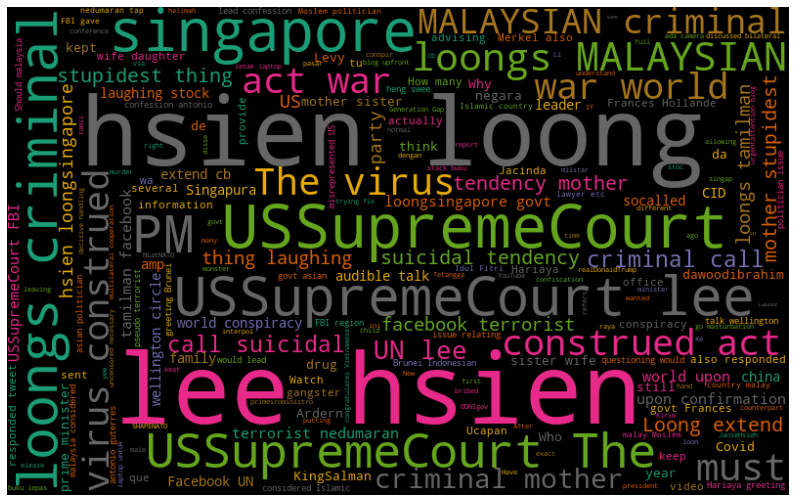

In [70]:
all_words = ' '.join([text for text in tweets_df['absolute_tidy_tweets'][tweets_df.sentiment == 'pos']])
generate_wordcloud(all_words)

#### <a id='4B'>B. Most common words in negative tweets</a>

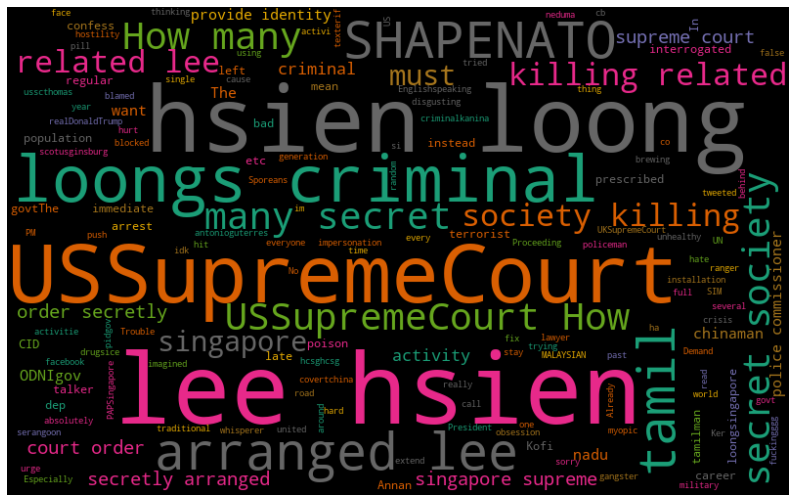

In [71]:
all_words = ' '.join([text for text in tweets_df['absolute_tidy_tweets'][tweets_df.sentiment == 'neg']])
generate_wordcloud(all_words)

- One thing to notice here is that word _'deep learning'_ has been used more than _'Machine Learning', 'AI', 'Artificial Intelligence', 'BigData'_ and _'DataScience'_, which shows the buzz of deep learning these days.

- AI, DeepLearning and MachineLearning have clearly been used in both positive and negative tweets, which is very obvious.
However, in negative tweets we can also see negative words as well like *stop, wrong, Unfortunately, fall, Cancer, shit, Greed, pressure, problem, complex, biased, never etc.*

#### <a id='4C'>C. Most commonly used Hashtags</a>

In [72]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [73]:
hashtags = hashtag_extract(tweets_df['tidy_tweets'])
hashtags = sum(hashtags, [])

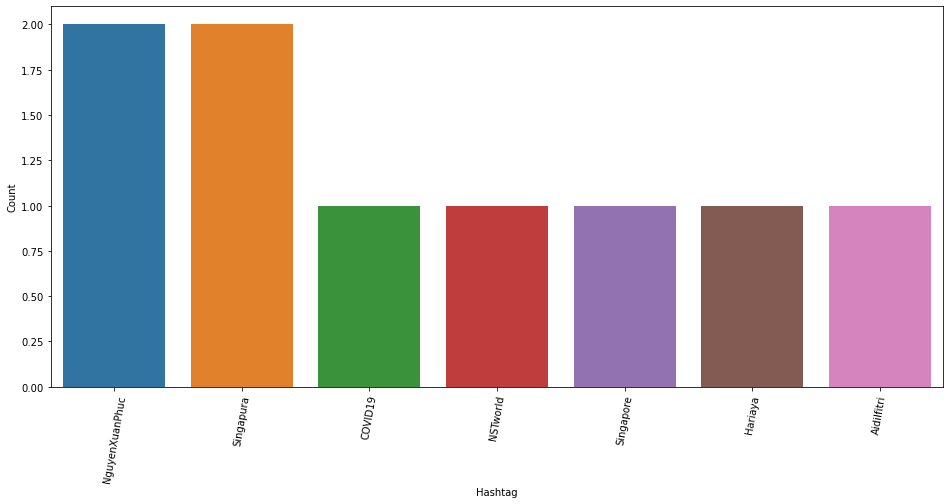

In [74]:
generate_hashtag_freqdist(hashtags)

As expected, AI, DeepLearning and MachineLearning are most common hashtags.

In [75]:
# For sake of consistency, we are going to discard the records which contains no phrases i.e where tweets_df['key_phrases'] contains []
tweets_df2 = tweets_df[tweets_df['key_phrases'].str.len()>0]

## <a id='5'>5. Feature Extraction</a>

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1. __Bag of words (Simple vectorization)__
2. __TF-IDF (Term Frequency - Inverse Document Frequency)__

We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.

Check out my below kernel to properly understand these techniques:<br/>
__https://www.kaggle.com/amar09/text-pre-processing-and-feature-extraction__

### <a id='5A'>A. Feature Extraction for 'Key Words'</a>

In [76]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(tweets_df2['absolute_tidy_tweets'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweets_df2['absolute_tidy_tweets'])

### <a id='5B'>B. Feature Extraction for 'Key Phrases'</a>

In [77]:
phrase_sents = tweets_df2['key_phrases'].apply(lambda x: ' '.join(x))

# BOW phrase features
bow_phrase_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow_phrase_feature = bow_phrase_vectorizer.fit_transform(phrase_sents)

# TF-IDF phrase feature
tfidf_phrase_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
tfidf_phrase_feature = tfidf_phrase_vectorizer.fit_transform(phrase_sents)

## <a id='6'>6. Model Building: Sentiment Analysis</a>

#### Map target variables to  {0, 1}

In [78]:
target_variable = tweets_df2['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

In [79]:
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

In [80]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

### <a id='6A'>A. Predictions on 'key words' based features</a>

#### <a id='6Aa'>a. BOW word features</a>

Accuracy Score - 0.8596491228070176


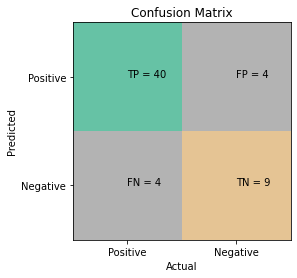

In [81]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

#### <a id='6Ab'>b. TF-IDF word features</a>

Accuracy Score - 0.8596491228070176


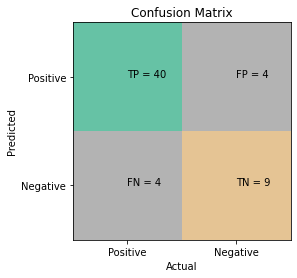

In [82]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

### <a id='6B'>B. Predictions on 'key phrases' based features</a>

#### <a id='6Ba'>a. BOW Phrase features</a>

Accuracy Score - 0.7719298245614035


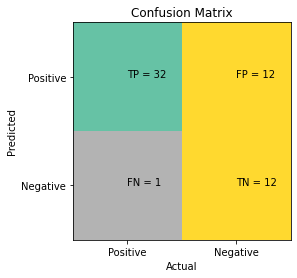

In [83]:
X_train, X_test, y_train, y_test = train_test_split(bow_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

#### <a id='6Bb'>b. TF-IDF Phrase features</a>

Accuracy Score - 0.7894736842105263


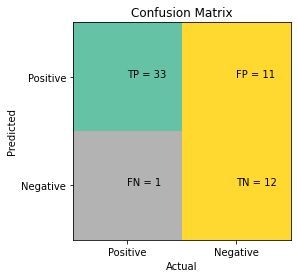

In [84]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

Features extracted from 'key words' helps model in performing better. They have better positive predictions than the later one. However, using 'key-phrase' based features improves the negative predictions.<br/><br/>
__This is it from my side, suggestions are always welcome. Thanks :)__